In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
g = {'Male':1,'Female':0}
df['gender'] = df['sex'].replace(g)
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [7]:
LE = LabelEncoder()

In [8]:
df['Gender LE'] = LE.fit_transform(df['sex'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,Gender LE
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0


In [11]:
df['Day LE'] = LE.fit_transform(df['day'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,Gender LE,Day LE
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2


In [12]:
df['Day LE'].nunique()

4

In [13]:
pd.get_dummies(df['sex'])

sex,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
239,1,0
240,0,1
241,1,0
242,1,0


In [14]:
pd.get_dummies(df['day'])

day,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0


In [15]:
pd.get_dummies(df,columns=['sex']).head()

,total_bill,tip,smoker,day,time,size,gender,Gender LE,Day LE,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,0,2,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,2,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,2,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,2,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,0,2,0,1


In [17]:
pd.get_dummies(df,columns=['sex'],drop_first=True).head()

,total_bill,tip,smoker,day,time,size,gender,Gender LE,Day LE,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,0,2,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,2,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,2,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,2,0
4,24.59,3.61,No,Sun,Dinner,4,0,0,2,1


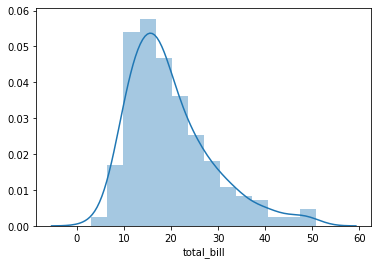

In [19]:
sns.distplot(df['total_bill'])

In [20]:
df['ZTB'] = (df['total_bill']-df['total_bill'].mean())/df['total_bill'].std()  #zscore technique
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,Gender LE,Day LE,ZTB
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2,0.539635


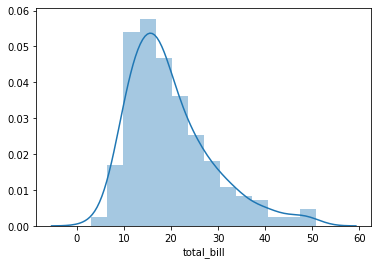

In [21]:
sns.distplot(df['total_bill'])

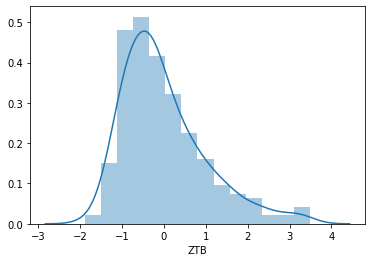

In [22]:
sns.distplot(df['ZTB'])

In [23]:
df['total_bill'].skew()

1.1332130376158205

In [24]:
df['ZTB'].skew()

1.1332130376158207

In [25]:
df['total_bill'].kurt()

1.2184840156638854

In [26]:
df['ZTB'].kurt()

1.2184840156638828

In [27]:
df['MM TB'] = (df['total_bill'] - df['total_bill'].min())/(df['total_bill'].max()-df['total_bill'].min())  # MaxMin Method, the data in range 0 to 1
df.head()

,total_bill,tip,sex,smoker,day,time,size,gender,Gender LE,Day LE,ZTB,MM TB
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2,-0.314066,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,2,-1.061054,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,2,0.137497,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,2,0.437416,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2,0.539635,0.450775


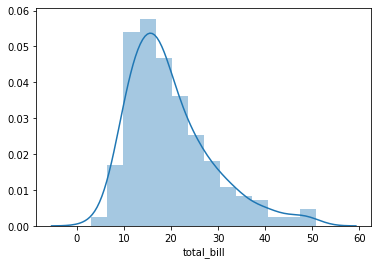

In [28]:
sns.distplot(df['total_bill'])

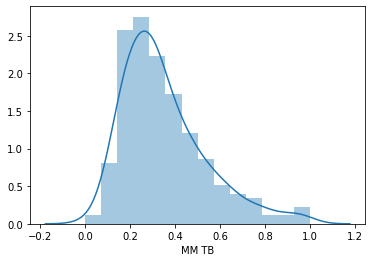

In [29]:
sns.distplot(df['MM TB'])


In [30]:
print(df['total_bill'].skew())
print(df['MM TB'].skew())


1.1332130376158205
1.1332130376158203


In [31]:
print(df['total_bill'].kurt())
print(df['MM TB'].kurt())

1.2184840156638854
1.2184840156638836
